# <span style="color:darkblue"> Lecture 1a: Introduction to Jupyter Notebooks </span>

<font size="5"> 

The basic structure for running Python for data projects

<img src="figures/project_flow.png" alt="drawing" width="650"/>

- Python is a general purpose language
- Researchers and practitioners add new functionalities all the time
- New features are included as packages on top of the "basic" installation

***

# <span style="color:darkblue"> STEP 0: Preliminaries </span>

<font size="5"> 

- A Virtual Environment is a **directory** (folder in your computer) <br>
that contains a specific **collection of packages**

- A package is a folder containing a set of Python scripts or <br>
modules which allow you to accomplish a defined task <br> 
(visualization, analysis, mathematical operations, etc.)

<font size = "5">

To manage packages open "Anaconda Navigator" on your <br>
computer and go to the "Environment" Tab

<img src="figures/anaconda_navigator_installed.png" alt="drawing" width="650"/>

<font size = "5">

In the future, as your data analysis needs expand, <br>
you way want to click on the "Not installed" packages <br>
to download cool new packages!

<img src="figures/anaconda_navigator_notinstalled.png" alt="drawing" width="650"/>

# <span style="color:darkblue"> STEP 1: Setup Working Environment </span>

<font size="5"> 

Double Check that Python is linked to VS Code

<img src="figures/python_kernel.png" alt="drawing" width="650"/>

- If not already linked, it will say "Select Kernel"
- Click button, choose "Python Environments", then select <br>
the version of Python that contains the word "anaconda"


<font size = "5">

(a) Import Packages:

- Jupyter notebooks launches with very basic options
- The "import" command adds libraries to the working enviroment. 
- We can give the libraries a nickname with "as"



```matplotlib``` allows us to do nice graphs in Python <br>
``` pandas ``` allows us to work with datasets

In [1]:
# Notes about nicknames:
# - For example, "matplotlib.pyplot" is a long name. Let's call it "plt"
# - Similarly, let's call "pandas" as "pd"
# - Try adding your own nickname!
# - To avoid errors, be consistent with your nicknames

import matplotlib.pyplot as plt
import pandas as pd

<font size="5"> 

(b) Open datasets

Run the command "read_csv" from the library <br>
"pandas" (nicknamed "pd"). 


In [2]:
print('Hello, World!')

Hello, World!


In [3]:
# You can use "." to run subcommands contained in a library.
# The subcommand "read_csv()" opens the file in parenthesis.
# We use the "=" symbol to store the dataset in the working environment under the name "carfeatures"

carfeatures = pd.read_csv('data/features.csv')

<font size="5"> 

You can open the datasets in the current environment
- Click on the "Variables" button in the top bar to open a panel

<img src="figures/topbar.png" alt="drawing" width="650"/>

- Double click on "carfeatures" in the "Jupyter: Variables" tab

<img src="figures/sampledata.png" alt="drawing" width="650"/>

- Each row is an observation (a car)
- Each column is the value of a variable (a feature of that car)

***


# <span style="color:darkblue"> STEP 2: Run Analyses </span>

<font size="5"> 

Output data for all the columns

In [4]:
# Entering the name of a dataframe produces an output with some rows

carfeatures

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


<font size="5"> 

Output data for a single column 'cylinders'

In [6]:
# We use square brackets [...] to subset information from data 
# Text/strings have to be written in quotation marks
# This command extracts the column 'cylinders'

carfeatures['horsepower']


0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

<font size="5"> 

Example: Compute a frequency table

In [9]:
# crosstab counts how many rows fall into categories
# "index" is the category
# "columns" is a custom title

table = pd.crosstab(index = carfeatures['cylinders'],columns = "count")
table   


col_0,count
cylinders,
3,4
4,204
5,3
6,84
8,103


In [10]:
table.columns.name

'col_0'

In [11]:
table.columns.name = 'column name'
table

column name,count
cylinders,
3,4
4,204
5,3
6,84
8,103


In [13]:
#-- Try the command again but this time change the title

table1 = pd.crosstab(index = carfeatures['horsepower'],columns = "count")
table1   



col_0,count
horsepower,
100,17
102,1
103,1
105,12
107,1
...,...
95,14
96,3
97,9


<font size="5"> 

Example: Compute basic summary statistics for all variables

In [18]:
# "describe" computes the count, mean, std, min, 25% quantile, 50%, 75%, max
# automatically excludes variables with text values
# otherwise includes all numeric variables

carfeatures['horsepower'] = pd.to_numeric(carfeatures['horsepower'],errors='coerce')

carfeatures.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.268683,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


<font size="5"> 

Example: Display a scatter plot 

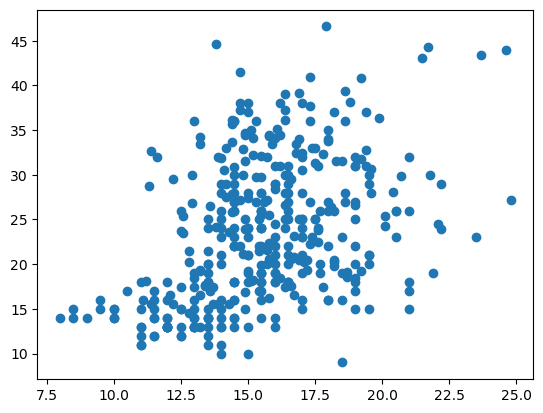

In [19]:
plt.scatter(x = carfeatures['acceleration'], y = carfeatures['mpg'])
plt.show()

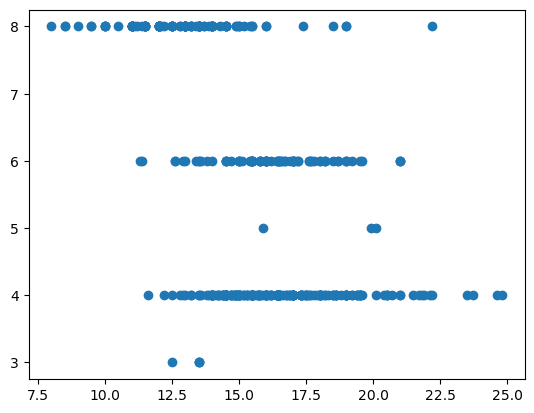

In [20]:
# Try another scatter plot with x = "acceleration"

plt.scatter(x = carfeatures['acceleration'], y = carfeatures['cylinders'])
plt.show()
